In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
filename = "/kaggle/input/heart-disease-uci-dataset/processed.cleveland.data"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv(filename, names=column_names, na_values=["?"])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [7]:
df_cleaned = df.dropna()
df_cleaned

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [8]:
df_cleaned.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
value_mapping = {0: 0, 1: 1, 2: 1, 3: 1, 4: 1}

df_cleaned['target'] = df_cleaned['target'].map(value_mapping)
df_cleaned['target'].value_counts()

target
0    160
1    137
Name: count, dtype: int64

In [10]:
df_cleaned

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


In [11]:
X = df_cleaned.drop('target', axis=1)
y = df_cleaned['target']

In [12]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [13]:
y

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: target, Length: 297, dtype: int64

In [14]:
# from imblearn.over_sampling import SMOTE
# adasyn = SMOTE(random_state=42)
# X_res, y_res = adasyn.fit_resample(X, y)

In [15]:
# y_res.value_counts()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print("shape X_train:", X_train.shape)
print("shape X_test:", X_test.shape)
print("shape y_train:", y_train.shape)
print("shape y_test:", y_test.shape)

shape X_train: (237, 13)
shape X_test: (60, 13)
shape y_train: (237,)
shape y_test: (60,)


In [17]:
y_test.value_counts()

target
0    31
1    29
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train

array([[0.625     , 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.39583333, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.85416667, 1.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.72916667, 1.        , 1.        , ..., 0.5       , 0.33333333,
        1.        ],
       [0.54166667, 1.        , 1.        , ..., 0.5       , 0.33333333,
        1.        ]])

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, LSTM, MaxPooling1D, GlobalAveragePooling1D, AveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [22]:
tf.keras.backend.clear_session()

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') >= 92):   
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(92*100))   
            self.model.stop_training = True

# Best: 0.7966312056737589, using {'units': 32, 'lstm': 128, 'filters': 32, 'epochs': 250, 'dropout': 0.3, 'batch_size': 8}
# 0.8148936170212766, using {'units_03': 128, 'units_02': 32, 'units_01': 64, 'epochs': 100, 'dropout': 0.2, 'batch_size': 16}
            
model = Sequential()
model.add(Conv1D(128, 3, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(MaxPooling1D(2))
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

callbacks = myCallback()

er = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

# Latih model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
8/8 [==============================] - 10s 82ms/step - loss: 0.6948 - accuracy: 0.4515 - val_loss: 0.6841 - val_accuracy: 0.4833
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 0.6830 - accuracy: 0.6287 - val_loss: 0.6799 - val_accuracy: 0.5500
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6723 - accuracy: 0.6709 - val_loss: 0.6613 - val_accuracy: 0.7833
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 0.6493 - accuracy: 0.7257 - val_loss: 0.6259 - val_accuracy: 0.7833
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6059 - accuracy: 0.7426 - val_loss: 0.5654 - val_accuracy: 0.7667
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 0.5520 - accuracy: 0.7342 - val_loss: 0.5032 - val_accuracy: 0.7667
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 0.5354 - accuracy: 0.7300 - val_loss: 0.4826 - val_accuracy: 0.7500
Epoch 8/100
8/8 [====

Text(0, 0.5, 'Accuracy')

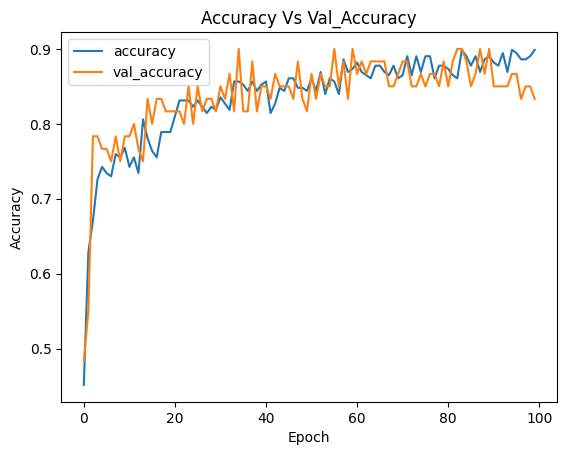

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])
plt.title('Accuracy Vs Val_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

2/2 [==============================] - 0s 3ms/step


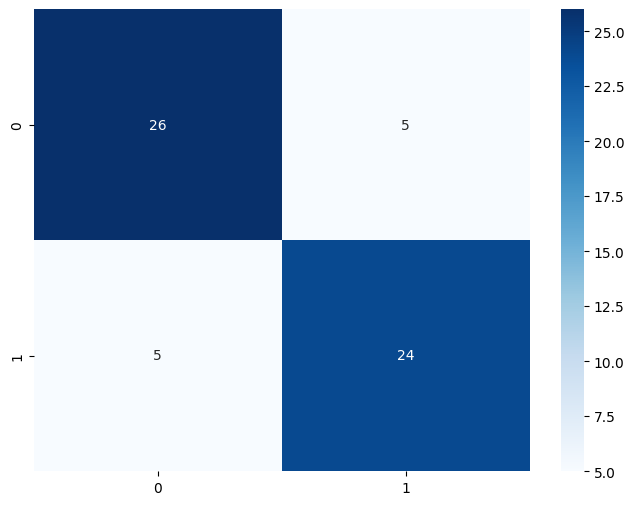

Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        31
           1       0.83      0.83      0.83        29

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



In [24]:
y_pred = model.predict(X_test)

# Membuat visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred.round())
f = plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
plt.show()
f.savefig('randomsearch_cm_hybrid.png')

# Membuat classification report
classification_rep = classification_report(y_test, y_pred.round())
print('Classification Report: ')
print(classification_rep)

In [25]:
tf.keras.backend.clear_session()

# Create a CNN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1], )))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > 0.92):   
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(0.92*100))   
            self.model.stop_training = True

er = EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights=True)
cb = myCallback()

# Latih model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), callbacks=[cb])

Epoch 1/50
30/30 [==============================] - 2s 9ms/step - loss: 0.6650 - accuracy: 0.6835 - val_loss: 0.6125 - val_accuracy: 0.8000
Epoch 2/50
30/30 [==============================] - 0s 4ms/step - loss: 0.5908 - accuracy: 0.7806 - val_loss: 0.5386 - val_accuracy: 0.7833
Epoch 3/50
30/30 [==============================] - 0s 4ms/step - loss: 0.5287 - accuracy: 0.7890 - val_loss: 0.4788 - val_accuracy: 0.8333
Epoch 4/50
30/30 [==============================] - 0s 4ms/step - loss: 0.4705 - accuracy: 0.7848 - val_loss: 0.4512 - val_accuracy: 0.8500
Epoch 5/50
30/30 [==============================] - 0s 4ms/step - loss: 0.4311 - accuracy: 0.8186 - val_loss: 0.4211 - val_accuracy: 0.8333
Epoch 6/50
30/30 [==============================] - 0s 4ms/step - loss: 0.4039 - accuracy: 0.8186 - val_loss: 0.4019 - val_accuracy: 0.8333
Epoch 7/50
30/30 [==============================] - 0s 4ms/step - loss: 0.3915 - accuracy: 0.8439 - val_loss: 0.3879 - val_accuracy: 0.8167
Epoch 8/50
30/30 [==

2/2 [==============================] - 0s 3ms/step


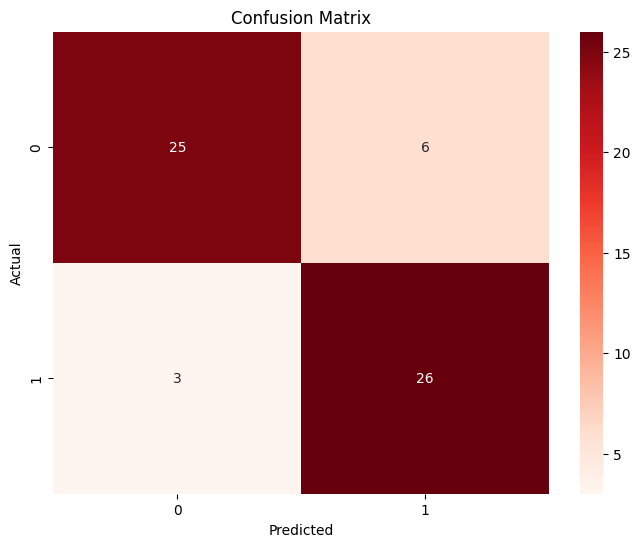

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        31
           1       0.81      0.90      0.85        29

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



In [26]:
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

# Membuat visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Membuat classification report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report: ')
print(classification_rep)

In [27]:
tf.keras.backend.clear_session()

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

er = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

# Latih model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
8/8 [==============================] - 2s 31ms/step - loss: 0.6821 - accuracy: 0.5105 - val_loss: 0.6581 - val_accuracy: 0.6167
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6442 - accuracy: 0.6498 - val_loss: 0.6254 - val_accuracy: 0.7667
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6110 - accuracy: 0.7722 - val_loss: 0.5896 - val_accuracy: 0.8333
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 0.5868 - accuracy: 0.7595 - val_loss: 0.5527 - val_accuracy: 0.8333
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.5297 - accuracy: 0.8312 - val_loss: 0.5135 - val_accuracy: 0.8500
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.4919 - accuracy: 0.8228 - val_loss: 0.4805 - val_accuracy: 0.8000
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.4781 - accuracy: 0.7975 - val_loss: 0.4670 - val_accuracy: 0.8167
Epoch 8/100
8/8 [=========

Text(0, 0.5, 'Accuracy')

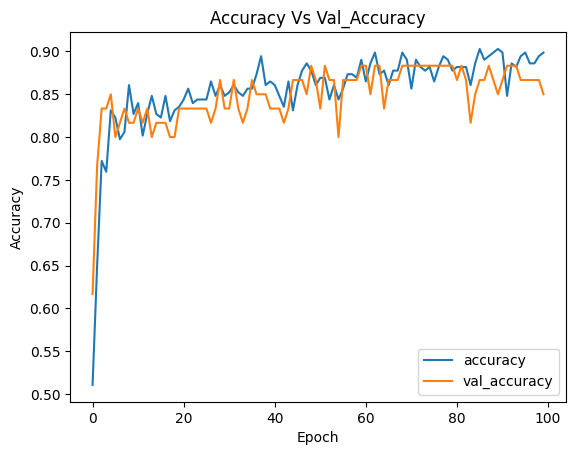

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])
plt.title('Accuracy Vs Val_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

2/2 [==============================] - 0s 3ms/step


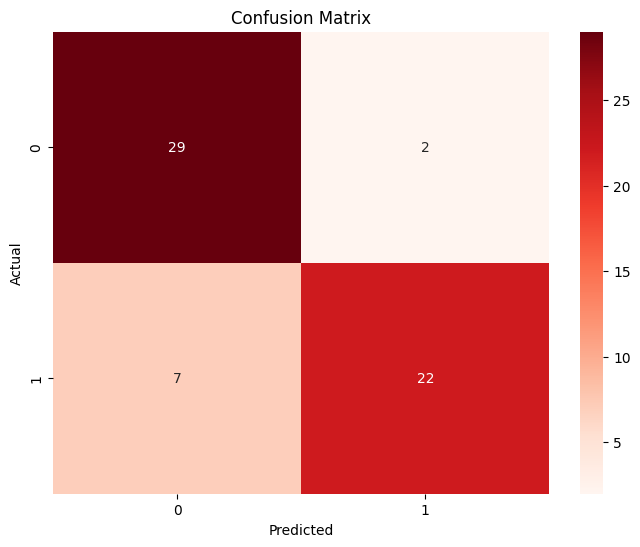

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        31
           1       0.92      0.76      0.83        29

    accuracy                           0.85        60
   macro avg       0.86      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60



In [29]:
y_pred = model.predict(X_test)

# Membuat visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred.round())
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Membuat classification report
classification_rep = classification_report(y_test, y_pred.round())
print('Classification Report: ')
print(classification_rep)

In [30]:
pip install scikeras

  Obtaining dependency information for scikeras from https://files.pythonhosted.org/packages/5d/fa/9c1967952e7889d698f10ba8b6af79dfaa2e05178d97a79fbd9d1b44e589/scikeras-0.12.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [31]:
from scikeras.wrappers import KerasClassifier

def hybrid_model(filters, lstm, units, dropout):
    tf.keras.backend.clear_session()
    
    model = Sequential()
    model.add(Conv1D(filters, 3, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(MaxPooling1D(2))
    model.add(LSTM(lstm))
    model.add(Dense(units))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [32]:
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

In [33]:
import time
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'filters': [32, 64, 128],
    'lstm': [32, 64, 128],
    'units': [32, 64, 128],
    'dropout': [0.2, 0.5],
    'epochs': [50, 100],
    'batch_size': [8, 16, 32]
}

hybrid = KerasClassifier(hybrid_model, filters=32, lstm=128, units=32, dropout=0.2, verbose=0)
grid = GridSearchCV(estimator=hybrid, param_grid=param_grid, scoring='accuracy', verbose=1, cv=5, return_train_score=True)
start_time = time.time()
grid_results = grid.fit(X_train, y_train)
time_took = time.time() - start_time

print(f"Total runtime: {hms_string(time_took)}")
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Total runtime: 3:44:24.15
Best: 0.8355496453900709, using {'batch_size': 16, 'dropout': 0.2, 'epochs': 50, 'filters': 64, 'lstm': 64, 'units': 64}
0.7930851063829787 (0.09279734311384935) with: {'batch_size': 8, 'dropout': 0.2, 'epochs': 50, 'filters': 32, 'lstm': 32, 'units': 32}
0.8184397163120567 (0.045933279916780215) with: {'batch_size': 8, 'dropout': 0.2, 'epochs': 50, 'filters': 32, 'lstm': 32, 'units': 64}
0.8184397163120567 (0.054911321754975324) with: {'batch_size': 8, 'dropout': 0.2, 'epochs': 50, 'filters': 32, 'lstm': 32, 'units': 128}
0.8187056737588652 (0.05080955208392083) with: {'batch_size': 8, 'dropout': 0.2, 'epochs': 50, 'filters': 32, 'lstm': 64, 'units': 32}
0.8143617021276596 (0.05861692474023791) with: {'batch_size': 8, 'dropout': 0.2, 'epochs': 50, 'filters': 32, 'lstm': 64, 'units': 64}
0.8186170212765956 (0.049313735151821685) with: {'batch_size': 8, 'dropout': 0.2, 'epochs': 50, 'filters': 32, 

In [34]:
df_result = pd.DataFrame(grid_results.cv_results_)
df_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_dropout,param_epochs,param_filters,param_lstm,param_units,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.690796,0.254981,0.423492,0.012969,8,0.2,50,32,32,32,...,0.793085,0.092797,186,0.851852,0.857143,0.852632,0.842105,0.810526,0.842852,0.016890
1,7.735205,0.303717,0.427353,0.012689,8,0.2,50,32,32,64,...,0.818440,0.045933,33,0.878307,0.830688,0.852632,0.842105,0.842105,0.849167,0.016139
2,7.755507,0.254115,0.419751,0.005549,8,0.2,50,32,32,128,...,0.818440,0.054911,33,0.857143,0.867725,0.873684,0.852632,0.857895,0.861816,0.007712
3,7.903787,0.270227,0.422276,0.004460,8,0.2,50,32,64,32,...,0.818706,0.050810,24,0.857143,0.862434,0.868421,0.847368,0.836842,0.854442,0.011193
4,7.811119,0.264191,0.425187,0.008471,8,0.2,50,32,64,64,...,0.814362,0.058617,40,0.857143,0.851852,0.889474,0.889474,0.857895,0.869167,0.016710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,5.686090,0.142041,0.646422,0.410590,32,0.5,100,128,64,64,...,0.801773,0.067566,120,0.883598,0.878307,0.889474,0.873684,0.900000,0.885013,0.009163
320,5.902384,0.502900,0.442902,0.043527,32,0.5,100,128,64,128,...,0.793174,0.059093,185,0.888889,0.899471,0.910526,0.868421,0.889474,0.891356,0.013921
321,5.905313,0.555874,0.457246,0.062249,32,0.5,100,128,128,32,...,0.772340,0.069497,282,0.894180,0.899471,0.889474,0.884211,0.878947,0.889256,0.007216
322,5.917769,0.525436,0.457359,0.047092,32,0.5,100,128,128,64,...,0.772252,0.040384,285,0.888889,0.883598,0.915789,0.884211,0.926316,0.899761,0.017795


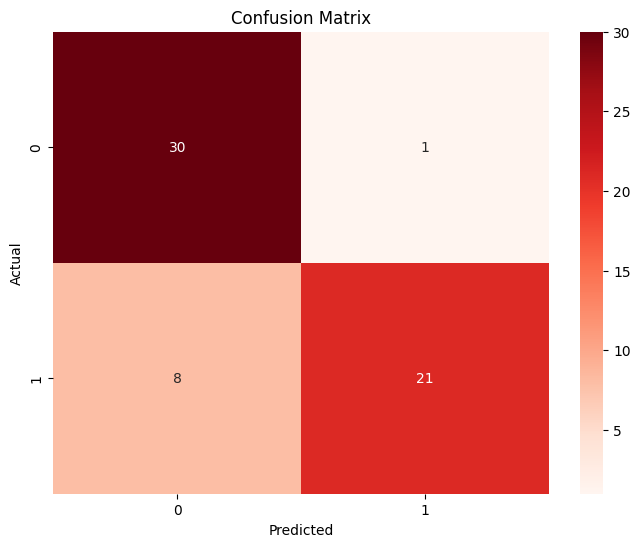

Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        31
           1       0.95      0.72      0.82        29

    accuracy                           0.85        60
   macro avg       0.87      0.85      0.85        60
weighted avg       0.87      0.85      0.85        60



In [35]:
y_pred = grid.predict(X_test)

# Membuat visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred.round())
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Membuat classification report
classification_rep = classification_report(y_test, y_pred.round())
print('Classification Report: ')
print(classification_rep)